In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This makes our plots higher resolution
plt.rcParams['figure.dpi'] = 100
gdp = pd.read_csv('./gdp_1960_2020.csv')
gdp.head()

,year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,543300000000,0.468483
1,1960,2,United Kingdom,Europe,73233967692,0.063149
2,1960,3,France,Europe,62225478000,0.053656
3,1960,4,China,Asia,59716467625,0.051493
4,1960,5,Japan,Asia,44307342950,0.038206


In [3]:
gdp['gdp_trillions'] = gdp['gdp'] / 1_000_000_000_000

In [4]:
gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions').tail(9)

,year,rank,country,state,gdp,gdp_percent,gdp_trillions
9967,2020,9,South Korea,Asia,1630525005469,0.021028,1.630525
9966,2020,8,Canada,America,1643407977068,0.021194,1.643408
9965,2020,7,Italy,Europe,1886445268340,0.024328,1.886445
9964,2020,6,France,Europe,2603004395901,0.033569,2.603004
9963,2020,5,India,Asia,2622983732006,0.033827,2.622984
9962,2020,4,United Kingdom,Europe,2707743777173,0.034920,2.707744
9961,2020,3,Germany,Europe,3806060140124,0.049084,3.806060
9960,2020,2,China,Asia,14722730697890,0.189870,14.722731
9959,2020,1,the United States,America,20936600000000,0.270006,20.936600


/var/folders/r6/4c778b992hv25hqynjsb5f380000gn/T/ipykernel_47892/1102143534.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(gdp_bar['country'],      # Set labels again


Text(-0.35, 0.08, 'Source: "GDP of all countries(1960-2020)" via Kaggle.com')

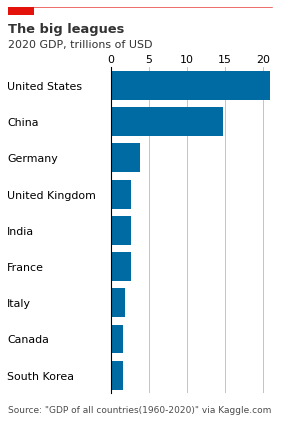

In [5]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(3,6))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)

# Setup data
gdp['country'] = gdp['country'].replace('the United States', 'United States')
gdp_bar = gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[-9:]

# Plot data
ax.barh(gdp_bar['country'], gdp_bar['gdp_trillions'], color='#006BA2', zorder=2)

# Set custom labels for x-axis
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_xticklabels([0, 5, 10, 15, 20])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(gdp_bar['country'],      # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 8.5)

# Add in line and tag
ax.plot([-.35, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-.35,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-.35, y=.96, s="The big leagues", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-.35, y=.925, s="2020 GDP, trillions of USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-.35, y=.08, s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

In [6]:
countries = gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[-9:]['country'].values
countries

array(['South Korea', 'Canada', 'Italy', 'France', 'India',
       'United Kingdom', 'Germany', 'China', 'United States'],
      dtype=object)

In [7]:
gdp['date'] = pd.to_datetime(gdp['year'], format='%Y')

/var/folders/r6/4c778b992hv25hqynjsb5f380000gn/T/ipykernel_47892/2476897436.py:35: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ax.set_xlim(pd.datetime(1958, 1, 1), pd.datetime(2023, 1, 1))
/var/folders/r6/4c778b992hv25hqynjsb5f380000gn/T/ipykernel_47892/2476897436.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0,25,5),            # Set labels again


Text(0.12, 0.01, 'Source: "GDP of all countries(1960-2020)" via Kaggle.com')

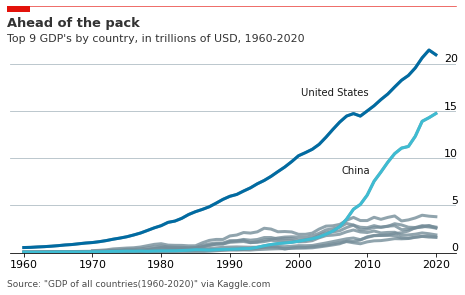

In [8]:

# Setup plot size.
fig, ax = plt.subplots(figsize=(8,4))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

# Plot data
# Loop through country names and plot each one.
for country in countries:
    ax.plot(gdp[gdp['country'] == country]['date'], 
            gdp[gdp['country'] == country]['gdp_trillions'], 
            color='#758D99', 
            alpha=0.8, 
            linewidth=3)

# Plot US and China separately
ax.plot(gdp[gdp['country'] == 'United States']['date'], 
        gdp[gdp['country'] == 'United States']['gdp_trillions'], 
        color='#006BA2',
        linewidth=3)

ax.plot(gdp[gdp['country'] == 'China']['date'], 
        gdp[gdp['country'] == 'China']['gdp_trillions'], 
        color='#3EBCD2',
        linewidth=3)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','left']].set_visible(False)

# Shrink y-lim to make plot a bit tigheter
ax.set_ylim(0, 23)

# Set xlim to fit data without going over plot area
ax.set_xlim(pd.datetime(1958, 1, 1), pd.datetime(2023, 1, 1))

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labelsize=11)        # Set tick label size

# Reformat y-axis tick labels
ax.set_yticklabels(np.arange(0,25,5),            # Set labels again
                   ha = 'right',                 # Set horizontal alignment to right
                   verticalalignment='bottom')   # Set vertical alignment to make labels on top of gridline      

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11)       # Set tick label size

# Add labels for USA and China
ax.text(x=.63, y=.67, s='United States', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.7, y=.4, s='China', transform=fig.transFigure, size=10, alpha=.9)


# Add in line and tag
ax.plot([0.12, .9],                  # Set width of line
        [.98, .98],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.91, s="Ahead of the pack", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Top 9 GDP's by country, in trillions of USD, 1960-2020", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=0.12, y=0.01, s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)


In [9]:
gdp_dumbbell = gdp[(gdp['country'].isin(countries)) & ((gdp['year'] == 1960) | (gdp['year'] == 2020))].sort_values(by='gdp')
gdp_dumbbell.head(5)

,year,rank,country,state,gdp,gdp_percent,gdp_trillions,date
31,1960,32,South Korea,Asia,3958190758,0.003413,0.003958,1960-01-01
7,1960,8,India,Asia,37029883875,0.031931,0.037030,1960-01-01
6,1960,7,Italy,Europe,40385288344,0.034824,0.040385,1960-01-01
5,1960,6,Canada,America,40461721692,0.034890,0.040462,1960-01-01
3,1960,4,China,Asia,59716467625,0.051493,0.059716,1960-01-01


/var/folders/r6/4c778b992hv25hqynjsb5f380000gn/T/ipykernel_47892/3512042687.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(gdp_dumbbell.index,       # Set labels again


Text(-0.08, 0.04, 'Source: "GDP of all countries(1960-2020)" via Kaggle.com')

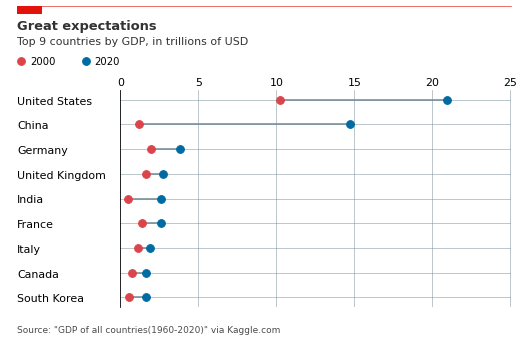

In [10]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(7,4))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='both', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Setup data
gdp_dumbbell = (gdp[(gdp['country'].isin(countries)) & ((gdp['year'] == 2000) | (gdp['year'] == 2020))][['year','gdp_trillions','country']]
                .pivot(index='country',columns='year', values='gdp_trillions')
                .sort_values(by=2020))

# Plot data
# Plot horizontal lines first
ax.hlines(y=gdp_dumbbell.index, xmin=gdp_dumbbell[2000], xmax=gdp_dumbbell[2020], color='#758D99', zorder=2, linewidth=2, label='_nolegend_', alpha=.8)
# Plot bubbles next
ax.scatter(gdp_dumbbell[2000], gdp_dumbbell.index, label='1960', s=60, color='#DB444B', zorder=3)
ax.scatter(gdp_dumbbell[2020], gdp_dumbbell.index, label='2020', s=60, color='#006BA2', zorder=3)

# Set xlim
ax.set_xlim(0, 25.05)

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(gdp_dumbbell.index,       # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Set Legend
ax.legend(['2000', '2020'], loc=(-.29,1.09), ncol=2, frameon=False, handletextpad=-.1, handleheight=1)

# Add in line and tag
ax.plot([-0.08, .9],                 # Set width of line
        [1.17, 1.17],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-0.08,1.17),               # Set location of rectangle by lower left corder
                           0.05,                       # Width of rectangle
                           -0.025,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-0.08, y=1.09, s="Great expectations", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-0.08, y=1.04, s="Top 9 countries by GDP, in trillions of USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-0.08, y=0.04, s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
#plt.savefig('images/economist_dumbbell.png',    # Set path and filename
#            dpi = 300,                          # Set dots per inch
#            bbox_inches="tight",                # Remove extra whitespace around plot
#            facecolor='white')                  # Set background color to white


/var/folders/r6/4c778b992hv25hqynjsb5f380000gn/T/ipykernel_47892/429455503.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  x_lim=[pd.datetime(1958, 1, 1), pd.datetime(2023, 1, 1)],
/var/folders/r6/4c778b992hv25hqynjsb5f380000gn/T/ipykernel_47892/429455503.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{x:.1f}" for x in np.linspace(y_lim[0], y_lim[1], 6)],            # Set labels again


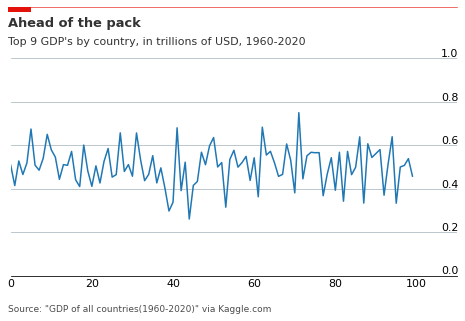

In [11]:
def make_nice_lineplot(fig_size=(8,4), 
                        y_lim=[0,23], 
                        x_lim=[pd.datetime(1958, 1, 1), pd.datetime(2023, 1, 1)], 
                        title_text="Ahead of the pack", 
                        sub_title_text="Top 9 GDP's by country, in trillions of USD, 1960-2020",
                        source_text="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""",
                        x_text=0.12):

    # Setup plot size.
    fig, ax = plt.subplots(figsize=fig_size)

    # Create grid 
    # Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
    ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

    # Remove splines. Can be done one at a time or can slice with a list.
    ax.spines[['top','right','left']].set_visible(False)

    # Shrink y-lim to make plot a bit tigheter
    ax.set_ylim(y_lim)

    # Set xlim to fit data without going over plot area
    ax.set_xlim([x_lim[0], x_lim[1]*1.1])     

    # Reformat y-axis tick labels
    ax.set_yticklabels([f"{x:.1f}" for x in np.linspace(y_lim[0], y_lim[1], 6)],            # Set labels again
                   ha = 'right',                 # Set horizontal alignment to right
                   verticalalignment='bottom')   # Set vertical alignment to make labels on top of gridline

    ax.yaxis.set_tick_params(pad=-2,         # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put y-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11)       # Set tick label size
    
    # Reformat x-axis tick labels
    ax.xaxis.set_tick_params(labeltop=False,      # Put x-axis labels on top
                         labelbottom=True,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

    # Add in line and tag
    ax.plot([x_text, 0.9],                  # Set width of line
        [y_lim[1]*1.06, y_lim[1]*1.06],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
    ax.add_patch(plt.Rectangle((x_text,y_lim[1]*1.06),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

    # Add in title and subtitle
    ax.text(x=x_text, y=y_lim[1]*0.99, s=title_text, transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
    ax.text(x=x_text, y=y_lim[1]*0.93, s=sub_title_text, transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

    # Set source text
    ax.text(x=x_text, y=y_lim[0], s=source_text, transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)


    return fig, ax


x = np.arange(100)
y = 0.1*np.random.randn(len(x)) + 0.5

fig, ax = make_nice_lineplot(x_lim=[0,100], y_lim=[0,1], x_text=0.12)

ax.plot(x, y)

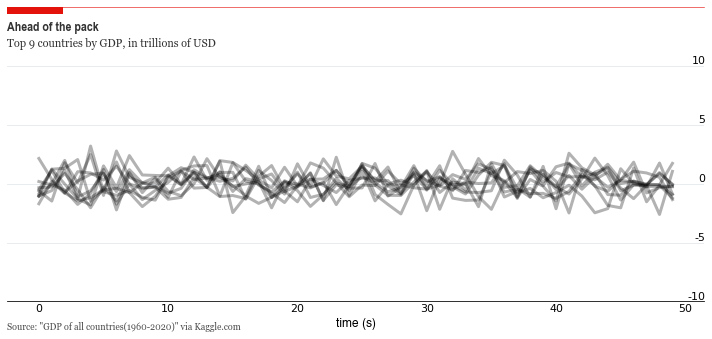

In [86]:
x = np.arange(50)

fig, ax = plt.subplots(figsize=(10,5))

for idx in range(10):
    ax.plot(x, np.random.randn(len(x)), alpha=0.3, lw=3, color='k')

# Create grid 
ax.grid(which="major", axis='y', color='#758D99', alpha=0.2, zorder=1)    

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','left']].set_visible(False)

# y-axis

## limits
ax.set_ylim([-10, 10])    

## ticks
ax.set_yticks(np.arange(-10, 15, 5))
## tick labels

ax.set_yticklabels([-10, -5, 0, 5, 10],            # Set labels again
                   ha = 'right',                 # Set horizontal alignment to right
                   verticalalignment='bottom')   # Set vertical alignment to make labels on top of gridline


## tick label params
ax.yaxis.set_tick_params(pad=-2,         # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put y-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11)       # Set tick label size

# x-axis
## label
ax.set_xlabel('time (s)', fontname = "Helvetica", fontsize=12)
## limits
## ticks
## tick labels
ax.xaxis.set_tick_params(labelsize=11)        # Set tick label size

## tick label params
ax.xaxis.set_tick_params(labeltop=False,      # Put x-axis labels on top
                         labelbottom=True,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Add in line and tag
ax.plot([0, 1],                 # Set width of line
        [1.25, 1.25],                  # Set height of line
    transform=ax.transAxes,   # Set location relative to plot
    clip_on=False, 
    color='#E3120B', 
    linewidth=.6)
ax.add_patch(plt.Rectangle((0, 1.25),                 # Set location of rectangle by lower left corder
                        0.08,                       # Width of rectangle
                        -0.03,                      # Height of rectangle. Negative so it goes down.
                        facecolor='#E3120B', 
                        transform=ax.transAxes, 
                        clip_on=False, 
                        linewidth = 0))

# Add in title and subtitle
ax.text(x=0, y=1.15, s="Ahead of the pack", transform=ax.transAxes, ha='left', fontsize=13, weight='bold', alpha=.8, fontname="Arial Narrow")
ax.text(x=0, y=1.08, s="Top 9 countries by GDP, in trillions of USD", transform=ax.transAxes, ha='left', fontsize=11, alpha=.8, fontname="Georgia")                         

# Set source text
ax.text(x=0, y=-0.12, s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", transform=ax.transAxes, ha='left', fontsize=9, alpha=.7, fontname="Georgia")

plt.tight_layout()